## Text Mining

<img src="img/text-miners.jpeg" width="500">

#### How is text mining different? What is text?

- Order the words from **SMALLEST** to **LARGEST** units
 - character
 - corpora
 - sentence
 - word
 - corpus
 - paragraph
 - document

(after it is all organized)

- Any disagreements about the terms used?

# Tokenization
## start small

In [2]:
token_test = "Here is a sentence. Or two, I don't think there will be more."
token_test_2 = "i thought this sentence was good."
token_test_3 = "Here's a sentence... maybe two. Depending on how you like to count!"

In [5]:
# let's tokenize a document... into sentences
def make_sentences(doc):
    for sent in doc.split('.'):
        if sent:
            yield sent

list(make_sentences(token_test))

['Here is a sentence', " Or two, I don't think there will be more"]

In [ ]:
# let's tokenize a document into words
# with these 3 test cases what would you look out for?
def tokenize_it(doc):
    for word in doc.split(' '):
        yield word

tokenize_it(token_test)

## New library!

while we have seen language processing tools in spark, NLTK is its own python library. And of course, it has its own [documentation](https://www.nltk.org/)

In [6]:
import nltk
import sklearn

## Bigger Data

In [7]:
import requests
resp = requests.get('http://www.gutenberg.org/cache/epub/5200/pg5200.txt')
metamorph = resp.text

In [8]:
print(metamorph[:1000])

﻿The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***




Copyright (C) 2002 David Wyllie.





  Metamorphosis
  Franz Kafka

Translated by David Wyllie



I


One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


Load your article here

In [9]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
metamorph_tokens_raw = nltk.regexp_tokenize(metamorph, pattern)
print(metamorph_tokens_raw[:100])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Metamorphosis', 'by', 'Franz', 'Kafka', 'Translated', 'by', 'David', 'Wyllie', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'This', 'is', 'a', 'COPYRIGHTED', 'Project', 'Gutenberg', 'eBook', 'Details', 'Below', 'Please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'Title', 'Metamorphosis', 'Author', 'Franz', 'Kafka', 'Translator', 'David', 'Wyllie', 'Release', 'Date', 'August', 'EBook', 'First', 'posted', 'May', 'Last', 'updated', 'May', 'Language', 'English', 'START', 'OF', 'THIS']


In [10]:
metamorph_tokens = [i.lower() for i in metamorph_tokens_raw]
print(metamorph_tokens[:100])


['the', 'project', 'gutenberg', 'ebook', 'of', 'metamorphosis', 'by', 'franz', 'kafka', 'translated', 'by', 'david', 'wyllie', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'this', 'is', 'a', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'below', 'please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'august', 'ebook', 'first', 'posted', 'may', 'last', 'updated', 'may', 'language', 'english', 'start', 'of', 'this']


In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/enkeboll/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
stop_words = set(stopwords.words('english'))
metamorph_tokens_stopped = [w for w in metamorph_tokens if not w in stop_words]
print(metamorph_tokens_stopped[:100])

['project', 'gutenberg', 'ebook', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'net', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'please', 'follow', 'copyright', 'guidelines', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'august', 'ebook', 'first', 'posted', 'may', 'last', 'updated', 'may', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosis', 'copyright', 'c', 'david', 'wyllie', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armour', 'like', 'back', 'lifted', 'head', 'little', 'could', 'see

## Stemming / Lemmatizing

### Stemming - Porter Stemmer 
<img src="https://cdn.homebrewersassociation.org/wp-content/uploads/Baltic_Porter_Feature-600x800.jpg" width="300">

In [14]:
from nltk.stem import PorterStemmer, SnowballStemmer

stemmer = PorterStemmer()
example = ['caresses', 'flies', 'dies', 'mules', 'denied',
           'died', 'agreed', 'owned', 'humbled', 'sized',
           'meeting', 'stating', 'siezing', 'itemization',
           'sensational', 'traditional', 'reference', 'colonizer',
           'plotted']

In [16]:
singles = [stemmer.stem(e) for e in metamorph_tokens_stopped[:100]]
print(*singles)

project gutenberg ebook metamorphosi franz kafka translat david wylli ebook use anyon anywher cost almost restrict whatsoev may copi give away use term project gutenberg licens includ ebook onlin www gutenberg net copyright project gutenberg ebook detail pleas follow copyright guidelin file titl metamorphosi author franz kafka translat david wylli releas date august ebook first post may last updat may languag english start project gutenberg ebook metamorphosi copyright c david wylli metamorphosi franz kafka translat david wylli one morn gregor samsa woke troubl dream found transform bed horribl vermin lay armour like back lift head littl could see brown belli


### Stemming - Snowball Stemmer
<img src="https://localtvwiti.files.wordpress.com/2018/08/gettyimages-936380496.jpg" width="300">

In [17]:
print(*SnowballStemmer.languages, sep='\n')

arabic
danish
dutch
english
finnish
french
german
hungarian
italian
norwegian
porter
portuguese
romanian
russian
spanish
swedish


In [19]:
stemmer = SnowballStemmer("english")
print(*[stemmer.stem(w) for w in metamorph_tokens_stopped[:100]], sep='\n')

project
gutenberg
ebook
metamorphosi
franz
kafka
translat
david
wylli
ebook
use
anyon
anywher
cost
almost
restrict
whatsoev
may
copi
give
away
use
term
project
gutenberg
licens
includ
ebook
onlin
www
gutenberg
net
copyright
project
gutenberg
ebook
detail
pleas
follow
copyright
guidelin
file
titl
metamorphosi
author
franz
kafka
translat
david
wylli
releas
date
august
ebook
first
post
may
last
updat
may
languag
english
start
project
gutenberg
ebook
metamorphosi
copyright
c
david
wylli
metamorphosi
franz
kafka
translat
david
wylli
one
morn
gregor
samsa
woke
troubl
dream
found
transform
bed
horribl
vermin
lay
armour
like
back
lift
head
littl
could
see
brown
belli


### Porter vs Snowball

In [20]:
print(SnowballStemmer("english").stem("generously"))
print(SnowballStemmer("porter").stem("generously"))

generous
gener


### Use Snowball on Metamorphosis

In [21]:
meta_stemmed = [stemmer.stem(word) for word in metamorph_tokens_stopped]
print(meta_stemmed[:100])

['project', 'gutenberg', 'ebook', 'metamorphosi', 'franz', 'kafka', 'translat', 'david', 'wylli', 'ebook', 'use', 'anyon', 'anywher', 'cost', 'almost', 'restrict', 'whatsoev', 'may', 'copi', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'www', 'gutenberg', 'net', 'copyright', 'project', 'gutenberg', 'ebook', 'detail', 'pleas', 'follow', 'copyright', 'guidelin', 'file', 'titl', 'metamorphosi', 'author', 'franz', 'kafka', 'translat', 'david', 'wylli', 'releas', 'date', 'august', 'ebook', 'first', 'post', 'may', 'last', 'updat', 'may', 'languag', 'english', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosi', 'copyright', 'c', 'david', 'wylli', 'metamorphosi', 'franz', 'kafka', 'translat', 'david', 'wylli', 'one', 'morn', 'gregor', 'samsa', 'woke', 'troubl', 'dream', 'found', 'transform', 'bed', 'horribl', 'vermin', 'lay', 'armour', 'like', 'back', 'lift', 'head', 'littl', 'could', 'see', 'brown', 'belli']


### Lemmatizer

In [23]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better"))

rocks : rock
corpora : corpus
better : better


In [26]:
from nltk.corpus import wordnet


def get_wordnet_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

In [27]:
nltk.pos_tag(metamorph_tokens_stopped)[:10]

[('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'NN'),
 ('metamorphosis', 'NN'),
 ('franz', 'NN'),
 ('kafka', 'NN'),
 ('translated', 'VBD'),
 ('david', 'JJ'),
 ('wyllie', 'NN'),
 ('ebook', 'NN')]

In [28]:
metamorph_lemmas_pos = []
for x, y in nltk.pos_tag(metamorph_tokens_stopped):
    metamorph_lemmas_pos.append((x, get_wordnet_pos(y)))

In [30]:
metamorph_lemmas_pos[:100]

[('project', 'n'),
 ('gutenberg', 'n'),
 ('ebook', 'n'),
 ('metamorphosis', 'n'),
 ('franz', 'n'),
 ('kafka', 'n'),
 ('translated', 'v'),
 ('david', 'a'),
 ('wyllie', 'n'),
 ('ebook', 'n'),
 ('use', 'n'),
 ('anyone', 'n'),
 ('anywhere', 'r'),
 ('cost', 'v'),
 ('almost', 'r'),
 ('restrictions', 'n'),
 ('whatsoever', 'v'),
 ('may', 'n'),
 ('copy', 'v'),
 ('give', 'v'),
 ('away', 'r'),
 ('use', 'n'),
 ('terms', 'n'),
 ('project', 'v'),
 ('gutenberg', 'a'),
 ('license', 'n'),
 ('included', 'v'),
 ('ebook', 'a'),
 ('online', 'n'),
 ('www', 'n'),
 ('gutenberg', 'a'),
 ('net', 'n'),
 ('copyrighted', 'v'),
 ('project', 'n'),
 ('gutenberg', 'n'),
 ('ebook', 'n'),
 ('details', 'n'),
 ('please', 'v'),
 ('follow', 'v'),
 ('copyright', 'a'),
 ('guidelines', 'n'),
 ('file', 'r'),
 ('title', 'a'),
 ('metamorphosis', 'n'),
 ('author', 'n'),
 ('franz', 'n'),
 ('kafka', 'n'),
 ('translator', 'n'),
 ('david', 'n'),
 ('wyllie', 'n'),
 ('release', 'n'),
 ('date', 'n'),
 ('august', 'n'),
 ('ebook', 'n'),
 (

### Use Lemmatizer on Metamorphosis

In [31]:
meta_lemmaed = []
for word, pos in metamorph_lemmas_pos:
    meta_lemmaed.append(lemmatizer.lemmatize(word, pos=pos))
print(*zip(metamorph_tokens_stopped[100:200], meta_lemmaed[100:200]), sep='\n')

('slightly', 'slightly')
('domed', 'domed')
('divided', 'divided')
('arches', 'arch')
('stiff', 'stiff')
('sections', 'section')
('bedding', 'bed')
('hardly', 'hardly')
('able', 'able')
('cover', 'cover')
('seemed', 'seem')
('ready', 'ready')
('slide', 'slide')
('moment', 'moment')
('many', 'many')
('legs', 'leg')
('pitifully', 'pitifully')
('thin', 'thin')
('compared', 'compare')
('size', 'size')
('rest', 'rest')
('waved', 'wave')
('helplessly', 'helplessly')
('looked', 'look')
("what's", "what's")
('happened', 'happen')
('thought', 'thought')
('dream', 'dream')
('room', 'room')
('proper', 'proper')
('human', 'human')
('room', 'room')
('although', 'although')
('little', 'little')
('small', 'small')
('lay', 'lay')
('peacefully', 'peacefully')
('four', 'four')
('familiar', 'familiar')
('walls', 'wall')
('collection', 'collection')
('textile', 'textile')
('samples', 'sample')
('lay', 'lay')
('spread', 'spread')
('table', 'table')
('samsa', 'samsa')
('travelling', 'travel')
('salesman', '

## Here is a short list of additional considerations when cleaning text:

- Handling large documents and large collections of text documents that do not fit into memory.
- Extracting text from markup like HTML, PDF, or other structured document formats.
- Transliteration of characters from other languages into English.
- Decoding Unicode characters into a normalized form, such as UTF8.
- Handling of domain specific words, phrases, and acronyms.
- Handling or removing numbers, such as dates and amounts.
- Locating and correcting common typos and misspellings.

## Frequency distributions

In [32]:
from nltk import FreqDist

In [33]:
meta_freqdist = FreqDist(meta_stemmed)

In [34]:
meta_freqdist.most_common(50)

[('gregor', 298),
 ('would', 187),
 ('room', 133),
 ('could', 120),
 ('work', 114),
 ('even', 104),
 ('father', 102),
 ('sister', 101),
 ('door', 97),
 ('gutenberg', 94),
 ('mother', 90),
 ('project', 88),
 ('back', 83),
 ('one', 76),
 ('time', 74),
 ('way', 66),
 ('look', 61),
 ('tm', 57),
 ('open', 56),
 ('use', 55),
 ('get', 52),
 ('said', 51),
 ('littl', 49),
 ('go', 49),
 ('without', 47),
 ('first', 45),
 ('still', 45),
 ('want', 44),
 ('like', 43),
 ('see', 42),
 ('hand', 41),
 ('made', 40),
 ('make', 40),
 ('head', 39),
 ('much', 39),
 ('come', 39),
 ('day', 38),
 ('thing', 38),
 ('move', 38),
 ('chief', 38),
 ('thought', 37),
 ('clerk', 37),
 ('turn', 36),
 ('away', 35),
 ('samsa', 34),
 ('let', 33),
 ('bed', 32),
 ('well', 32),
 ('went', 32),
 ('famili', 32)]

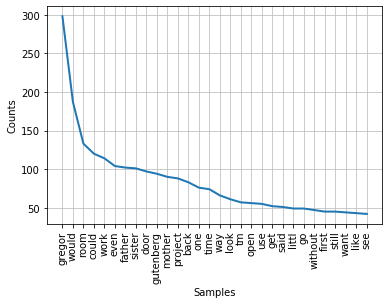

In [35]:
%matplotlib inline
meta_freqdist.plot(30, cumulative=False)

# Vectorization
## this step happens after we account for stopwords and lemmas; depending on the library...
* we make a **Count Vector**, which is the formal term for a **bag of words**
* we use vectors to pass text into machine learning models


In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Let's check out the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)

In [37]:
# test the CountVectorizer method on 'basic_example'
basic_example = ['The Data Scientist wants to train a machine to train machine learning models.']
cv = CountVectorizer()
cv.fit(basic_example)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [39]:
# what info can we get from cv?
# hint -- look at the docs again
cv.transform(basic_example).toarray()

array([[1, 1, 2, 1, 1, 1, 2, 2, 1]])

In [41]:
cv.get_feature_names()

['data',
 'learning',
 'machine',
 'models',
 'scientist',
 'the',
 'to',
 'train',
 'wants']

## Vectorization allows us to compare two documents

In [42]:
# use pandas to help see what's happening
import pandas as pd

In [43]:
# we fit the CountVectorizer on the 'basic_example', now we transform 'basic_example'
example_vector_doc_1 = cv.transform(basic_example)

In [44]:
# what is the type

print(type(example_vector_doc_1))

<class 'scipy.sparse.csr.csr_matrix'>


In [45]:
# what does it look like

print(example_vector_doc_1)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	2
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	2
  (0, 7)	2
  (0, 8)	1


In [46]:
# let's visualize it
example_vector_df = pd.DataFrame(example_vector_doc_1.toarray(), columns=cv.get_feature_names())
example_vector_df

,data,learning,machine,models,scientist,the,to,train,wants
0,1,1,2,1,1,1,2,2,1


In [48]:
# here we compare new text to the CountVectorizer fit on 'basic_example'
new_text = ['the data scientist plotted the residual error of her model']
new_data = cv.fit_transform(new_text)
new_count = pd.DataFrame(new_data.toarray(),columns=cv.get_feature_names())
new_count

,data,error,her,model,of,plotted,residual,scientist,the
0,1,1,1,1,1,1,1,1,2


## N-grams

In [49]:
# in this the object 'sentences' becomes the corpus
sentences = ['The Data Scientist wants to train a machine to train machine learning models.',
             'the data scientist plotted the residual error of her model in her analysis',
             'Her analysis was so good, she won a Kaggle competition.',
             'The machine gained sentience']

In [54]:
# go back to the docs for count vectorizer, how would we use an ngram
# pro tip -- include stop words
bigrams = CountVectorizer(ngram_range=(1, 2))

In [56]:
bigram_vector = bigrams.fit_transform(sentences)
bigram_vector

<4x55 sparse matrix of type '<class 'numpy.int64'>'
	with 65 stored elements in Compressed Sparse Row format>

In [57]:
print(f'There are {str(len(bigrams.get_feature_names()))} features for this corpus')
bigrams.get_feature_names()[:10]

There are 55 features for this corpus


['analysis',
 'analysis was',
 'competition',
 'data',
 'data scientist',
 'error',
 'error of',
 'gained',
 'gained sentience',
 'good']

In [58]:
# let's visualize it
bigram_df = pd.DataFrame(bigram_vector.toarray(), columns=bigrams.get_feature_names())
bigram_df.head()

,analysis,analysis was,competition,data,data scientist,error,error of,gained,gained sentience,good,...,to,to train,train,train machine,wants,wants to,was,was so,won,won kaggle
0,0,0,0,1,1,0,0,0,0,0,...,2,2,2,2,1,1,0,0,0,0
1,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,1
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF
## Term Frequency - Inverse Document Frequency

$ \begin{align}
w_{i,j} = tf_{i,j} \times \log \dfrac{N}{df_i} \\
tf_{i,j} = \text{number of occurences of } i \text{ in} j \\
df_i = \text{number of documents containing} i \\
N = \text{total number of documents}
\end{align} $


In [59]:
tf_idf_sentences = ['The Data Scientist wants to train a machine to train machine learning models.',
                    'the data scientist plotted the residual error of her model in her analysis',
                    'Her analysis was so good, she won a Kaggle competition.',
                    'The machine gained sentiance']
# take out stop words
tfidf = TfidfVectorizer(stop_words='english')
# fit transform the sentences
tfidf_sentences = tfidf.fit_transform(tf_idf_sentences)

In [60]:
# visualize it
tfidf_df = pd.DataFrame(tfidf_sentences.toarray(), columns=tfidf.get_feature_names())

In [61]:
tfidf_df

,analysis,competition,data,error,gained,good,kaggle,learning,machine,model,models,plotted,residual,scientist,sentiance,train,wants,won
0,0.000000,0.000000,0.240692,0.000000,0.000000,0.000000,0.000000,0.305288,0.481384,0.000000,0.305288,0.000000,0.000000,0.240692,0.000000,0.610575,0.305288,0.000000
1,0.325557,0.000000,0.325557,0.412928,0.000000,0.000000,0.000000,0.000000,0.000000,0.412928,0.000000,0.412928,0.412928,0.325557,0.000000,0.000000,0.000000,0.000000
2,0.366739,0.465162,0.000000,0.000000,0.000000,0.465162,0.465162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465162
3,0.000000,0.000000,0.000000,0.000000,0.617614,0.000000,0.000000,0.000000,0.486934,0.000000,0.000000,0.000000,0.000000,0.000000,0.617614,0.000000,0.000000,0.000000


In [ ]:
# compared to bigrams
bigram_df

In [62]:
# now let's test out our TfidfVectorizer
test_tdidf = tfidf.transform(['this is a test document','look at me I am a test document'])

In [63]:
# this is a vector
test_tdidf

<2x18 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [64]:
test_tfidf_df = pd.DataFrame(test_tdidf.toarray(), columns=tfidf.get_feature_names())
test_tfidf_df

,analysis,competition,data,error,gained,good,kaggle,learning,machine,model,models,plotted,residual,scientist,sentiance,train,wants,won
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Measuring the Similarity Between Documents

We can tell how similar two documents are to one another, normalizing for size, by taking the cosine similarity of the two. 

This number will range from [0,1], with 0 being not similar whatsoever, and 1 being the exact same. A potential application of cosine similarity is a basic recommendation engine. If you wanted to recommend articles that are most similar to other articles, you could talk the cosine similarity of all articles and return the highest one.

<img src="./img/better_cos_similarity.png" width=600>

In [65]:
trial = CountVectorizer()
sunday_afternoon = ['I ate a burger at burger queen and it was very good.',
                    'I ate a hot dog at burger prince and it was bad',
                    'I drove a racecar through your kitchen door',
                    'I ate a hot dog at burger king and it was bad. I ate a burger at burger queen and it was very good']

trial.fit(sunday_afternoon)
text_data = trial.transform(sunday_afternoon)

In [67]:
text_data.toarray()

array([[1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1],
       [2, 2, 2, 1, 3, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0]])

In [74]:
text_data.toarray()[:,0]

array([1, 1, 0, 2])

In [ ]:
common_slang = {
    "hangry": 'hungry'
}

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
# the 0th and 2nd index lines are very different, a number close to 0
cosine_similarity(text_data[:, 0],text_data[:, 1])


array([[1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [0., 0., 0., 0.],
       [1., 1., 0., 1.]])

In [71]:
# the 0th and 3rd index lines are very similar, despite different lengths
cosine_similarity(text_data[0],text_data[3])

array([[0.91413793]])